DATA PREPROCESSING

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading the dataset
df = pd.read_csv("water_potability.csv")

# Handling missing values
df.fillna(df.mean(), inplace=True)

# Feature-target split
X = df.drop(columns=['Potability'])
y = df['Potability']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-validation-test split (70-15-15)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Training Samples: {X_train.shape[0]}, Validation: {X_val.shape[0]}, Test: {X_test.shape[0]}")


Training Samples: 2293, Validation: 491, Test: 492


MODEL BUILDING

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Defining the Model
def build_the_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.25),  # Dropout instead of weight regularization
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.25),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    optimizer = keras.optimizers.RMSprop(learning_rate=0.0005)  # Unique choice
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Creating the model instance
the_model = build_the_model()

# Displaying the model architecture
the_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

TRAINING THE MODEL

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

# Defining the early stopping (patience=20)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Training the model
history_model = the_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6933 - loss: 0.5880 - val_accuracy: 0.6843 - val_loss: 0.6190
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6860 - loss: 0.5895 - val_accuracy: 0.6843 - val_loss: 0.6196
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7003 - loss: 0.5800 - val_accuracy: 0.6823 - val_loss: 0.6206
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6992 - loss: 0.5770 - val_accuracy: 0.6802 - val_loss: 0.6208
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6909 - loss: 0.5718 - val_accuracy: 0.6741 - val_loss: 0.6209
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6763 - loss: 0.5874 - val_accuracy: 0.6741 - val_loss: 0.6210
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6920 - loss: 0.5808 - val_accuracy: 0.6741 - val_loss: 0.6199
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6822 - loss: 0.5827 - val_accuracy: 0.6741 - v

EVALUATING THE MODEL

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7201 - loss: 0.5863 
Test Accuracy: 0.6870


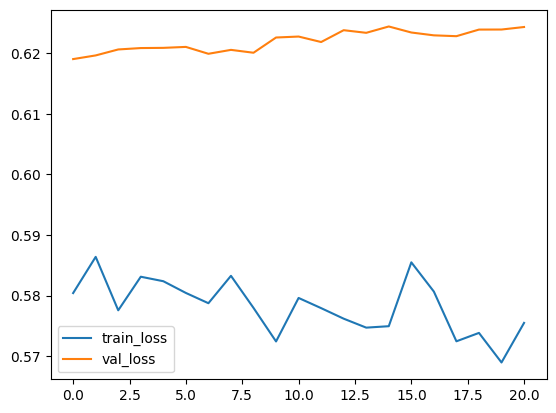

In [32]:
# Evaluating the model
test_loss, test_acc = the_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

import matplotlib.pyplot as plt

# Plot training history
plt.plot(history_model.history['loss'], label='train_loss')
plt.plot(history_model.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


COMPUTING Accuracy, F1 Score, Recall and Precision

In [34]:
from sklearn.metrics import classification_report, accuracy_score

# Predicting on the test set
y_pred = (the_model.predict(X_test) > 0.5).astype("int32")

# Computing the Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Classification report for F1 Score, Recall, Precision
report = classification_report(y_test, y_pred, target_names=["Not Potable", "Potable"], output_dict=True)

# Extracting the key metrics
f1_score = report["Potable"]["f1-score"]
recall = report["Potable"]["recall"]
precision = report["Potable"]["precision"]

# Printing results
print(f"Test Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test Accuracy: 0.6870
F1 Score: 0.4832
Recall: 0.3750
Precision: 0.6792
